# Recommender Systems Project

In [40]:
from collections import defaultdict
%matplotlib inline
import numpy as np                 # Multi Dimensional Array Handling
import pandas as pd                # Array and Dataframe Handling
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [41]:
#Reading Dataset
review_data = pd.read_csv("ratings_Electronics.csv")

In [42]:
review_data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [43]:
#Associating Names to the columns of the Dataframe
review_data.columns = ['userID', 'productID', 'Rating', 'TimeStamp']

In [44]:
review_data.head(50)

,userID,productID,Rating,TimeStamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [45]:
#Checking Width and Depth of the Data
print("Number of rows    :", review_data.shape[0])
print("Number of columns :", review_data.shape[1])

Number of rows    : 2728808
Number of columns : 4


In [46]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728808 entries, 0 to 2728807
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userID     object 
 1   productID  object 
 2   Rating     float64
 3   TimeStamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 83.3+ MB


In [47]:
#Changing datatypes of userId and ProductId to catgory as algorithms cannot operate on Object type data
review_data['userID'] = review_data['userID'].astype('category')
review_data['productID'] = review_data['productID'].astype('category')

In [48]:
review_data.describe(include= 'category').transpose()

,count,unique,top,freq
userID,2728808,1784864,A5JLAU2ARJ0BO,456
productID,2728808,148888,B0019EHU8G,12285


In [49]:
#Dropping timestamp attribute as it will t be required henceforth for analysis and model building
review_data = review_data.drop(['TimeStamp'], axis = 1)

###### Building Popular Recommendation System Model

In [50]:
#Storing copy of original dataframe into new dataframe object
pop_data = review_data.copy()
pop_data.groupby('productID')['Rating'].mean().head()


productID
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
0558835155    3.000000
Name: Rating, dtype: float64

In [51]:
pop_data.groupby('productID')['Rating'].mean().sort_values(ascending= False).head()

productID
0321732944    5.0
B0007QBI8U    5.0
B0019P10DQ    5.0
B0019O351C    5.0
B0019O17CQ    5.0
Name: Rating, dtype: float64

In [52]:
pop_data.groupby('productID')['Rating'].count().sort_values(ascending = False).head()

productID
B0019EHU8G    12285
B0002L5R78     9487
B000LRMS66     8715
B002MAPRYU     6599
B0012S4APK     5642
Name: Rating, dtype: int64

In [53]:
ratings_mean_count = pd.DataFrame(pop_data.groupby('productID')['Rating'].mean())

In [54]:
ratings_mean_count['rating_counts'] = pd.DataFrame(pop_data.groupby('productID')['Rating'].count())

In [55]:
ratings_mean_count.head()

,Rating,rating_counts
productID,,
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27
0558835155,3.000000,1


In [56]:
popular_movies = ratings_mean_count.sort_values(['rating_counts', 'Rating'], ascending = [False, False])

In [57]:
popular_movies.head(5)

,Rating,rating_counts
productID,,
B0019EHU8G,4.754497,12285
B0002L5R78,4.448614,9487
B000LRMS66,4.756627,8715
B002MAPRYU,3.913623,6599
B0012S4APK,4.334456,5642


##### Based on High Rating and Rating Count the Popularity Model will list the top Recommended Movies using Popular Recommender System.

In [58]:
new_data= review_data.copy()

##### Building User-User Collaborative Filtering Recommender Model:

In [59]:
new_data['Rating_Count'] = new_data.groupby(['userID'])['Rating'].transform('count')
new_data.drop_duplicates()

,userID,productID,Rating,Rating_Count
0,A2CX7LUOHB2NDG,0321732944,5.0,3
1,A2NWSAGRHCP8N5,0439886341,1.0,1
2,A2WNBOD3WNDNKT,0439886341,3.0,1
3,A1GI0U4ZRJA8WN,0439886341,1.0,1
4,A1QGNMC6O1VW39,0511189877,5.0,1
...,...,...,...,...
2728803,A3FAWTEE6164V6,B002N69J7E,5.0,2
2728804,A2L4LHJYO5ITYM,B002N69J7E,3.0,10
2728805,A1DZ6286XERSRK,B002N69J7E,5.0,2
2728806,A2SI92R2JL8P1B,B002N69J7E,5.0,1


In [60]:
new_data = new_data[new_data['Rating_Count'] > 50]
print(new_data['Rating_Count'].unique())

[ 83  60  53  56 456  79  72  68  74  87 121  70 200 177  61  54  90 119
  58 216 112  63  84 106  71  62 308  73  65  51 145 160  52 252 125  59
  97  75  86  82  64  57 101 132 276  81 103  88  96  69  55 118  78  98
 104 182  92  66 157 142  80 165 123  67 135 129  76  77 113 166]


In [61]:
new_data.head(100)

,userID,productID,Rating,Rating_Count
177,A17HMM1M7T9PJ1,0970407998,4.0,83
1776,A18S2VGUH9SCV5,1400501776,4.0,60
1986,A1K4G5YJDJQI6Q,1400532620,1.0,53
2081,A2ZR3YTMEEIIZ4,1400532655,5.0,56
2161,A5JLAU2ARJ0BO,1400532655,1.0,456
...,...,...,...,...
16147,A7EJERNB7IK3Z,B00000JFJS,5.0,75
16219,A2AEZQ3DGBBLPR,B00000JFMK,4.0,90
16283,A2B7BUH8834Y6M,B00000JFOF,5.0,125
16293,A2YHXGPCTENZY3,B00000JGLT,1.0,62


<Axes: >

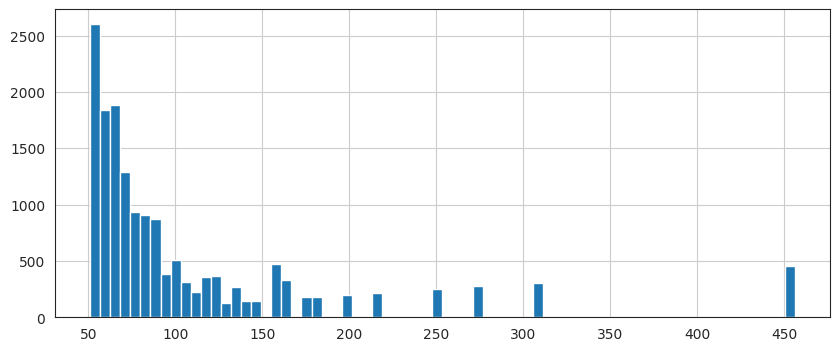

In [62]:
import seaborn as sns

sns.set_style('white')


# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))

new_data['Rating_Count'].hist(bins = 70)

In [63]:
!pip install surprise
from surprise import Dataset
from surprise import Reader
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

In [64]:
new_data_collab = new_data.drop(['Rating_Count'], axis = 1)

In [65]:
from surprise import Dataset
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(new_data_collab[['userID', 'productID', 'Rating']], reader)

In [66]:
trainset, testset = train_test_split(data, test_size = .30)

In [67]:
algo = KNNWithMeans(k = 1000, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [68]:
# we can now query for specific predicions
uid = str('A25RTRAPQAJBDJ')  # raw user id
iid = str('1400699169')  # raw item id

In [69]:
# getting a prediction for specific user and random item.
pred = algo.predict(uid, iid, verbose = True)

user: A25RTRAPQAJBDJ item: 1400699169 r_ui = None   est = 4.23   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [70]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [71]:
test_pred

[Prediction(uid='A3U41ZL33SS92P', iid='B001F7ARTQ', r_ui=5.0, est=3.5833333333333335, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2UQK3DAZ8NO2T', iid='B000EW8074', r_ui=4.0, est=4.801583374567046, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A5KMMY627T3W', iid='B00009UTLM', r_ui=5.0, est=4.22764517278233, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AC6Z7DP1Z5GHD', iid='B0011U65F2', r_ui=5.0, est=4.365384615384615, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1ODOGXEYECQQ8', iid='B00109Y2DQ', r_ui=5.0, est=4.972321955867125, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A3OXHLG6DIBRW8', iid='B0018MV7LA', r_ui=5.0, est=4.22764517278233, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3J8A5L5AF5TX9', iid='B002MAPRYU', r_ui=3.0, est=3.8219178082191783, details={'actual_k': 0, 'was_impossible': False}),

In [72]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.1214


1.1213776925993555

###### Printing Top 5 Recommendations for Popularity Recommendation Systems:

In [73]:
top_recommendations = 5

In [74]:
popular_movies.head(top_recommendations)    #Predicting top Recommendations from Popular Recommendation Systems

,Rating,rating_counts
productID,,
B0019EHU8G,4.754497,12285
B0002L5R78,4.448614,9487
B000LRMS66,4.756627,8715
B002MAPRYU,3.913623,6599
B0012S4APK,4.334456,5642


##### Printing Top 5 Recommendations for each user based on user - user collaborative technique.

In [75]:
def get_top_n(test_pred, n = 5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in test_pred:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n
top_n = get_top_n(test_pred, n = 5)
top_n

defaultdict(list,
            {'A3U41ZL33SS92P': [('B001MBLBXQ', 4.22764517278233),
              ('B0015Q4NQU', 4.22764517278233),
              ('B0000AZK4G', 4.22764517278233),
              ('B001LYUG3A', 4.22764517278233),
              ('B00008W7LN', 4.22764517278233)],
             'A2UQK3DAZ8NO2T': [('B000EW8074', 4.801583374567046),
              ('B000NVTZXY', 4.382978723404255),
              ('B0009OAFI4', 4.382978723404255),
              ('B0007WK8NA', 4.382978723404255),
              ('B000CSGJCS', 4.382978723404255)],
             'A5KMMY627T3W': [('B00005LENO', 4.343898552129529),
              ('B000J6FTUQ', 4.305057675244011),
              ('B00009UTLM', 4.22764517278233),
              ('B0009JK1NI', 4.22764517278233),
              ('B0009JK1N8', 4.22764517278233)],
             'AC6Z7DP1Z5GHD': [('B0011U65F2', 4.365384615384615),
              ('B0009H5VVM', 4.365384615384615),
              ('B00009VQJZ', 4.365384615384615),
              ('B00009UTQK', 4.36538

Summary:

1. The Popularity Recommender System and Collaborative Recommender System were developed using Amazon's electronic item dataset, which includes user IDs and ratings for specific products.
   In the case of Popularity-Based Recommendation Systems, the top 5 recommendations are tailored based on the highest-rated items. This approach partially mitigates the cold start problem.
   
2. We employ the User-User Collaborative Filtering Technique to generate a personalized list of the top 5 recommendations for individual users.
   This method offers personalized recommendations, addressing the limitations of the Popularity-Based Recommender System, which lacks variety. It takes into account user preferences and behavior, in addition to product ratings.
   We opt for the Pearson Similarity Technique over cosine similarity due to user bias in our dataset and the varying rating scales among users.

3. Consequently, a prudent strategy involves the use of both techniques. Start with the Popularity Recommender System for new users to introduce them to the platform and gather initial data to understand their preferences. Transition to User-User Collaborative Filtering once users have established patterns that can help refine recommendations.

4. While exploring recommendation techniques, we also attempted Item-Item Collaborative Filtering. However, this approach proved unfeasible due to memory limitations, particularly when employing k-Nearest Neighbors (kNN), which demands extensive memory resources.